# Sentiment Analysis of Live tweets

## 1. Training the model using a cleaned dataset

### Importing all dependencies for initial processing and Loading the data to a Pandas dataframe

In [16]:
#importing Dependencies
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [4]:
#Importing the Cleaned Data Set and dropping the NAN values from the Cleaned data set
csv = 'clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()
my_df.dropna(inplace=True)
my_df.reset_index(drop=True,inplace=True)
my_df['target'] = my_df['target'].replace(to_replace=4,value=1)
print(my_df.info())
print(my_df['target'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596041 entries, 0 to 1596040
Data columns (total 2 columns):
text      1596041 non-null object
target    1596041 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.4+ MB
None
0    798197
1    797844
Name: target, dtype: int64


## Vectorization of the Tweets 

In [11]:
%%time
#Vectorizing the tweets for Training 

from sklearn.feature_extraction.text import CountVectorizer

stop_words = ['in', 'of', 'at', 'a', 'the']
ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 3),stop_words= stop_words)
ngram_vectorizer.fit(my_df.text)
X = ngram_vectorizer.transform(my_df.text)

Wall time: 0 ns


## Traning the model using the SVM Linear Classifier with C=0.01

In [13]:
%%time

#Training the model for C value 0.01 as that gave the best F1 Score
"""F1 SCORE for C=0.001: 0.8144905955156294
The Confusion matrix for C=0.001: [[156192  42916]
 [ 33077 166826]]
F1 SCORE for C=0.005: 0.8269640935329224
The Confusion matrix for C=0.005: [[159219  39889]
 [ 30855 169048]]
F1 SCORE for C=0.01: 0.8292160338111313
The Confusion matrix for C=0.01: [[160222  38886]
 [ 30779 169124]]
F1 SCORE for C=0.05: 0.8284183561515495
The Confusion matrix for C=0.05: [[161416  37692]
 [ 31901 168002]]
F1 SCORE for C=0.1: 0.8261613903333785
The Confusion matrix for C=0.1: [[161429  37679]
 [ 32690 167213]]"""

#Training the Model on complete data as the above score is for 75% of the data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.externals import joblib

svm = LinearSVC(C=0.01)
svm.fit(X, my_df.target)
#Saving the Model
joblib.dump(svm,'svm_joblibC0_01')

#To load the model
model = joblib.load('svm_joblibC0_01')

C:\Users\ManoharRaoN\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Wall time: 17min 30s


## 2. Analyzing the tweet sentiment  on streaming Tweet with Keyword **Avengers** using the trained model and displaying the Tweet and plot comparison

--------------------
Tweet is 
 This is quality content
Sentiment of the tweet is Positive
--------------------



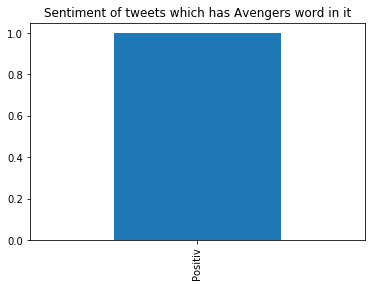

--------------------
Tweet is
 @deathdragon007 @TRHLofficial Like the Avengers destroyed NYC and Solovia; Nick Fury literally brainwashed Phil Coulson, his most loyal Agent; the Hulk “broke Harlem”; Iron Man murdered the Iraqi freedoms fighters in IM1. Cap killed hundreds of German soldiers who were just following orders.
Sentiment of the tweet is Negative
--------------------



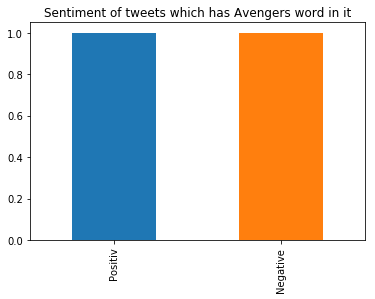

--------------------
Tweet is 
 RT @Avengers: The newest Avenger arrives TOMORROW! Discover deleted scenes and over an hour of bonus content when you bring home Marvel Stu…
Sentiment of the tweet is Positive
--------------------



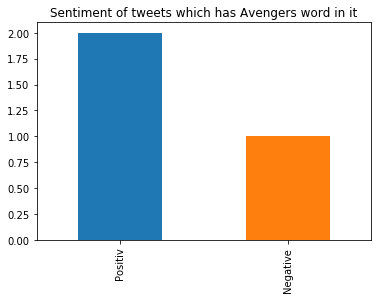

--------------------
Tweet is 
 RT @Xahraddeen_: I watched the wrong Avengers https://t.co/ocLN3BkG4P
Sentiment of the tweet is Positive
--------------------



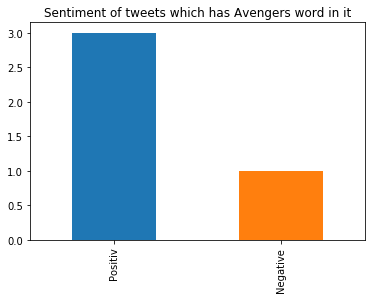

--------------------
Tweet is 
 RT @Elaqw5: Listen to #ScarlettJohansson talking about how @Kevfeige scolded the #OG6 in the @Avengers movie recordings because they behave…
Sentiment of the tweet is Positive
--------------------



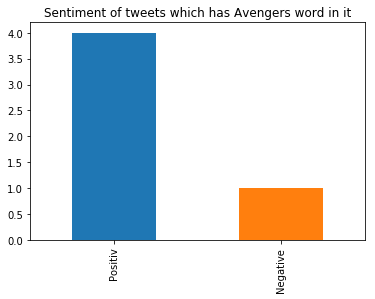

--------------------
Tweet is 
 RT @SwiftestNinja: Avengers Endgame Anime Opening https://t.co/h4oNqQFbkV
Sentiment of the tweet is Positive
--------------------



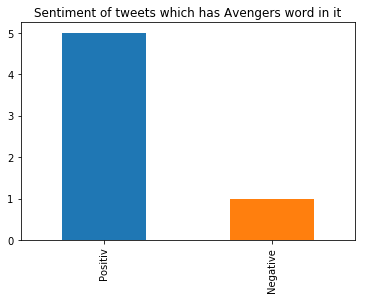

--------------------
Tweet is
 @Brodeyy_51 Top 3 films from 2014-2018

14:
Interstellar
Winter Soldier
Birdman
 
15:
Sicario
SWTFA
Ex Machina

16:
Arrival 
Hell or High Water
La La Land

17:
Blade Runner 2049
Hostiles
The Shape of Water

18:
Avengers: Infinity War
Cold War
The Favourite
Sentiment of the tweet is Positive
--------------------



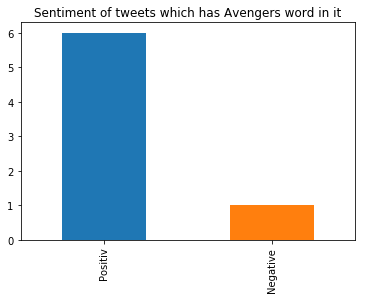

--------------------
Tweet is 
 Watching Avengers Age of Ultron!
Sentiment of the tweet is Positive
--------------------



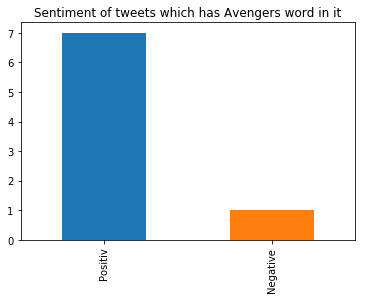

--------------------
Tweet is 
 RT @getFANDOM: Tony Stark's final message in 'Avengers: Endgame'  https://t.co/6eGqFhO3D7
Sentiment of the tweet is Positive
--------------------



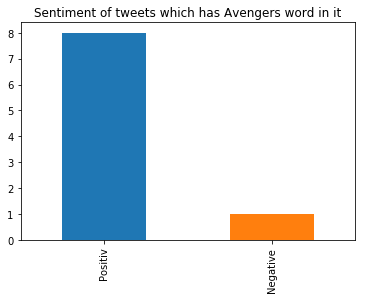

--------------------
Tweet is 
 RT @77MCU: To Our Heroes. To Our Avengers.

Robert Downey Jr #IronMan 
Chris Evans #CaptainAmerica  
Chris Hemsworth #Thor 
Mark Ruffalo #H…
Sentiment of the tweet is Positive
--------------------



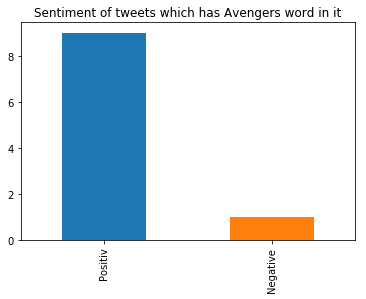

--------------------
Tweet is 
 RT @arcadeseals: me: im terrified of avengers

doctor: strange

me: [screams]
Sentiment of the tweet is Negative
--------------------



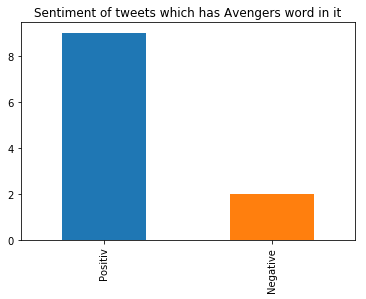

--------------------
Tweet is 
 The avengers have assembled
Sentiment of the tweet is Positive
--------------------



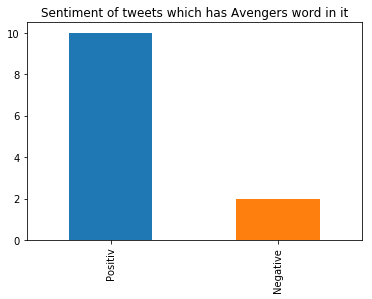

--------------------
Tweet is 
 RT @Avengers: The newest Avenger arrives TOMORROW! Discover deleted scenes and over an hour of bonus content when you bring home Marvel Stu…
Sentiment of the tweet is Positive
--------------------



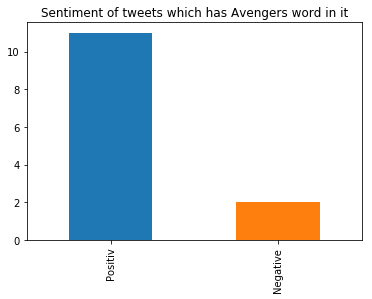

--------------------
Tweet is 
 RT @Denzi_DeeDz: Dawg when I went to carib for avengers my ass screamed the entire fighting scene idgaf!!!!
Sentiment of the tweet is Negative
--------------------



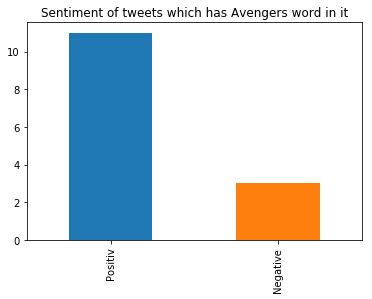

--------------------
Tweet is 
 RT @Xahraddeen_: I watched the wrong Avengers https://t.co/ocLN3BkG4P
Sentiment of the tweet is Positive
--------------------



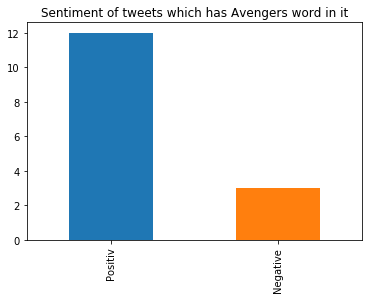

--------------------
Tweet is 
 RT @DRMovieNews1: The way Cap locks eyes at Thanos, you can see the determination in his eyes &amp; the reassured feeling that they have a chan…
Sentiment of the tweet is Positive
--------------------



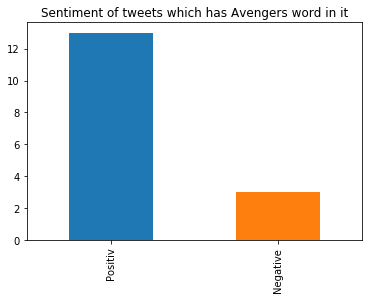

--------------------
Tweet is 
 RT @BamMathias: Zemo was the reason the Avengers lost in Infinity War
ZEMO WAS THE REASON THANOS WON
if y’all say that Zemo isn’t in the to…
Sentiment of the tweet is Negative
--------------------



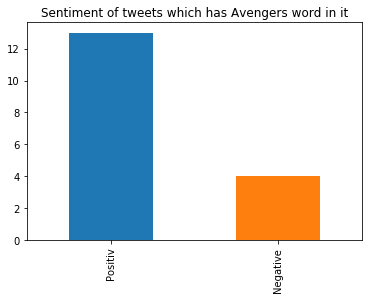

--------------------
Tweet is 
 RT @ComicBook: #DarkPhoenix writer and director Simon Kinberg is aiming for #Avengers: #Endgame and Dark Knight vibes -- in unique ways. ht…
Sentiment of the tweet is Positive
--------------------



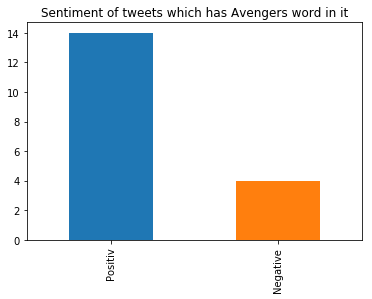

--------------------
Tweet is 
 RT @arcadeseals: me: im terrified of avengers

doctor: strange

me: [screams]
Sentiment of the tweet is Negative
--------------------



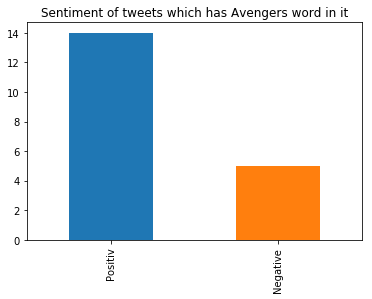

--------------------
Tweet is 
 RT @woIvern: the avengers: discuss about how they can save the world 

thor, nebula and tony: https://t.co/u5Wv3zyh2S
Sentiment of the tweet is Positive
--------------------



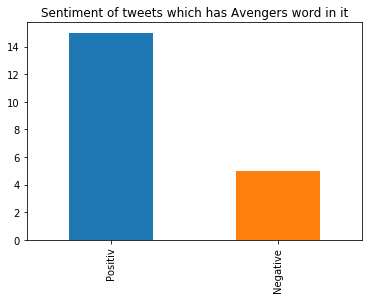

--------------------
Tweet is 
 RT @goshromanoff: it breaks my heart to know that natasha romanoff was so alone, sad, depressed in endgame. she was always like “staying to…
Sentiment of the tweet is Negative
--------------------



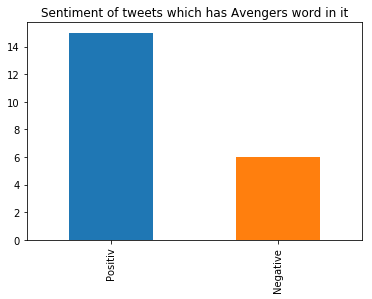

--------------------
Tweet is
 @rmbodenheimer Endgame references specific movies in a major way, so I would say watch the 1st Captain America, 1st Avengers, the 1st Guardians, Dr. Strange, Thor Ragnarok, and obvs Infinity War.
Sentiment of the tweet is Positive
--------------------



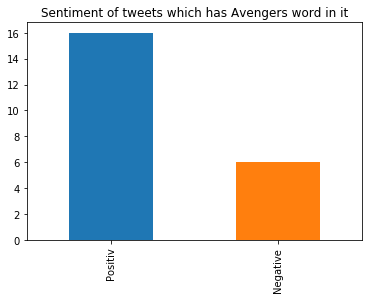

--------------------
Tweet is 
 RT @OriginalFunko: Here's a look at The Avengers Pop!s through the years. Which one is your favorite? #FunkoAvengers #Endgame #AvengersEndg…
Sentiment of the tweet is Positive
--------------------



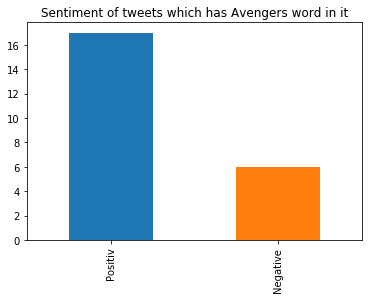

--------------------
Tweet is 
 RT @FUCKKEN: Thor BDS Art Scale 1/10 - Avengers: Endgame 
by ironstudiosus
#AvengersEndgame 
#Thor https://t.co/nVGC7r5ldM
Sentiment of the tweet is Positive
--------------------



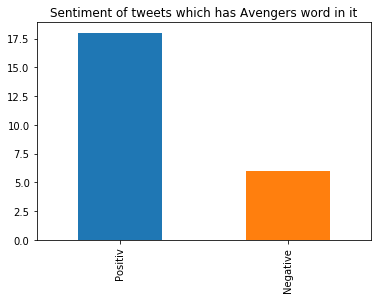

--------------------
Tweet is 
 RT @davem225: @brfootball He looks like groot from Avengers
Sentiment of the tweet is Positive
--------------------



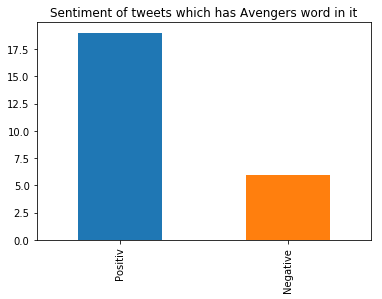

--------------------
Tweet is 
 Unfortunately, @ScottMendelson is bang on with this one...and I do wish things were different...: https://t.co/XALMGVeQQh
Sentiment of the tweet is Negative
--------------------



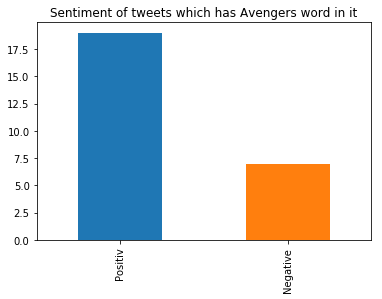

--------------------
Tweet is
 I think everyone should go see #AvengersEndgame again this weekend so it can pass Avatar. @Avengers @MarvelStudios @ChrisEvans @RobertDowneyJr @prattprattpratt
Sentiment of the tweet is Positive
--------------------



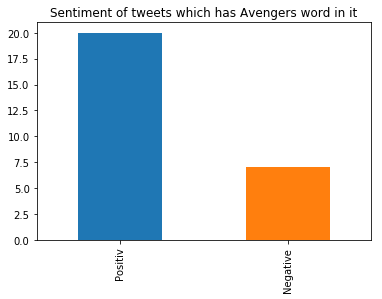

--------------------
Tweet is 
 RT @bwxtark: "I lost the kid."
"Let me go. It's okay."
"I love you 3000"
"Mr. Stark? We won"
"Cheeseburger"
"I. Am. Iron man"
"Avengers...…
Sentiment of the tweet is Positive
--------------------



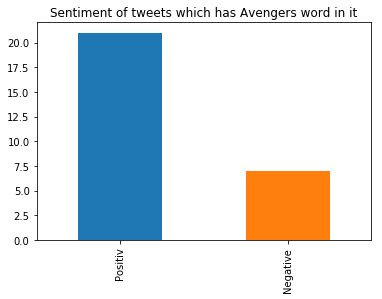

--------------------
Tweet is 
 RT @Avengers: The newest Avenger arrives TOMORROW! Discover deleted scenes and over an hour of bonus content when you bring home Marvel Stu…
Sentiment of the tweet is Positive
--------------------



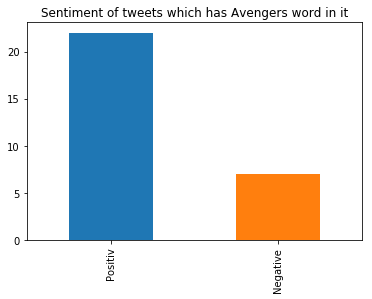

--------------------
Tweet is 
 RT @capsheroes: never forget when chris evans had a fan-girl moment over the avengers theme song https://t.co/K7sCDT3qYQ
Sentiment of the tweet is Positive
--------------------



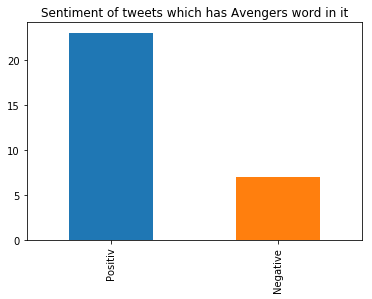

KeyboardInterrupt: 

In [15]:
#Use the model trained to Predict the sentiment analysis of Live tweets while streaming and saving the data to a new CSV
import tweepy
import csv
import matplotlib.pyplot as plt 
import pandas as pd

ACCESS_TOKEN = "859108424-kXjc2uF9Q97O8oJlJswKJSyZK0jQAveXeg4NNjzs"
ACCESS_TOKEN_SECRET = "5mzmbOhsmT5Mshz7DBiSBCW3Qop9RuVztgsfe64Lqt8QQ"
CONSUMER_KEY = "LMTTQcPtYRvEFkBHXSNH53Ilp"
CONSUMER_SECRET = "RpJbJM7Z5LcXOZwdQYWka1j9l71WkpQS64LpV1BYiaNVYttNYI"

plt.ion()

class MyStreamListener(tweepy.StreamListener):
    global df
    df = pd.DataFrame()
    
    def on_status(self, status):
        
        global df
        
        print("--------------------")
        try:
            m = status.extended_tweet["full_text"]
            m = ''.join(c for c in m if c <= '\uFFFF') #Removes Emojies for the googletrans API to work
            X = ngram_vectorizer.transform([m])
            if model.predict(X) == 0:
                print("Tweet is\n", m)
                print("Sentiment of the tweet is Negative")
                data = pd.DataFrame([{"Tweet": m, "Sentiment_Of_Tweet": 'Negative'}])
                df = df.append(data)
            else:
                print("Tweet is\n", m)
                print("Sentiment of the tweet is Positive")
                data = pd.DataFrame([{"Tweet": m, "Sentiment_Of_Tweet": 'Positiv'}])
                df= df.append(data)
                
        except AttributeError:
            m = status.text
            m = ''.join(c for c in m if c <= '\uFFFF') #Removes Emojies for the googletrans API to work"""
            X = ngram_vectorizer.transform([m])
            if model.predict(X) == 0:
                print("Tweet is \n", m)
                print("Sentiment of the tweet is Negative")
                data = pd.DataFrame([{"Tweet": m, "Sentiment_Of_Tweet": 'Negative'}])
                df= df.append(data)
            else:
                print("Tweet is \n", m)
                print("Sentiment of the tweet is Positive")
                data = pd.DataFrame([{"Tweet": m, "Sentiment_Of_Tweet": 'Positiv'}])
                df= df.append(data)
        print("--------------------\n")
        
        #SAVING the data to a CSV
        df.to_csv(r'Tweet_data.csv', index = None, header=True)
        
        #Plotting the Sentiment comparison
        CountStatus = pd.value_counts(df['Sentiment_Of_Tweet'].values, sort=True)
        CountStatus.plot.bar()
        plt.title('Sentiment of tweets which has Avengers word in it')
        plt.draw()
        plt.pause(0.1)
        
    def on_error(self, status):
        print(status)


if __name__ == "__main__":

    auth = tweepy.OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN,ACCESS_TOKEN_SECRET)
    API = tweepy.API(auth)

    myStreamListener = MyStreamListener()
    myStream = tweepy.Stream(auth = API.auth, listener=myStreamListener, tweet_mode='extended')
    plt.show(block=True)
    myStream.filter(track=['Avengers'],languages=['en'])
    
        